Part 1: K-means Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
# Exploring the dataset
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Exploring the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Exploring the dataset
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


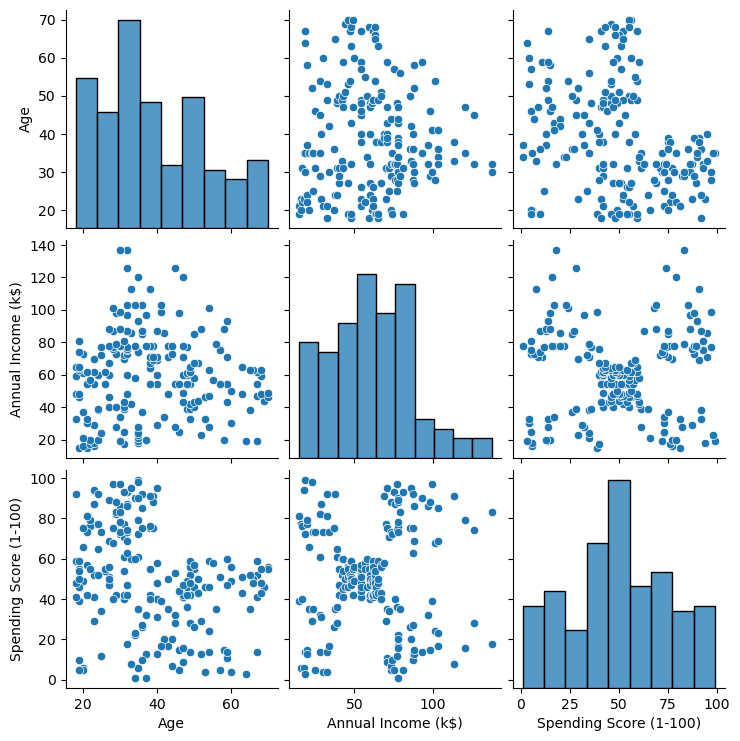

In [7]:
sns.pairplot(dataset.iloc[:,[2,3,4]])

In [8]:
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:,[3,4]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

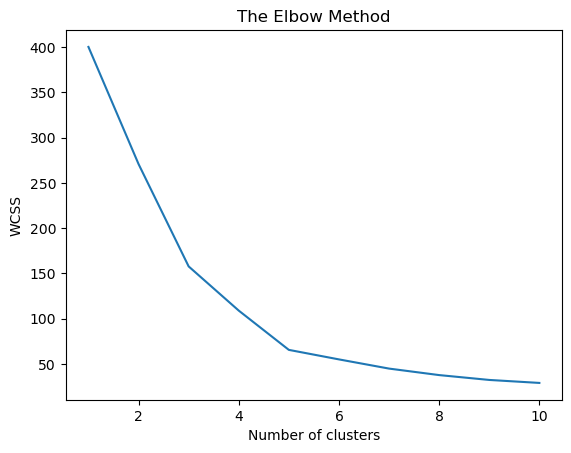

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

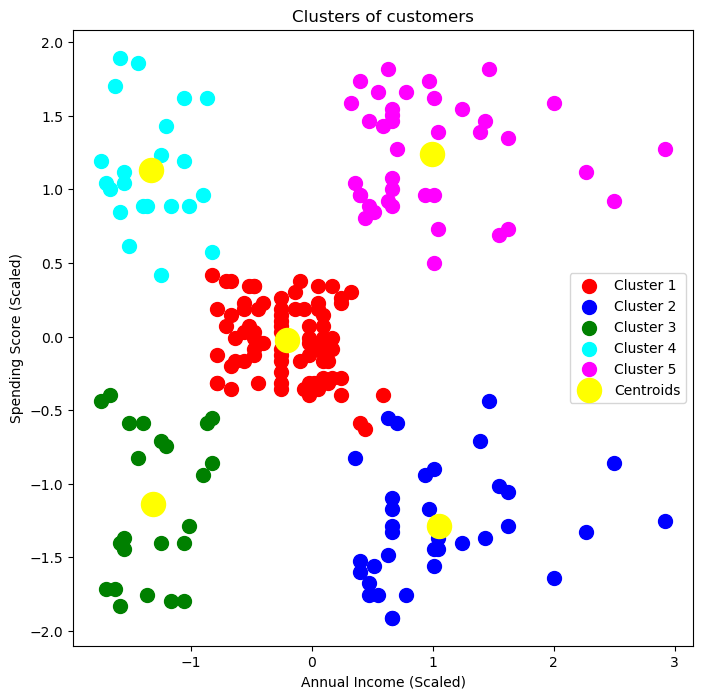

In [11]:
# Visualising the clusters
plt.figure(figsize = (8, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

Part 2: Hierarchical Clustering

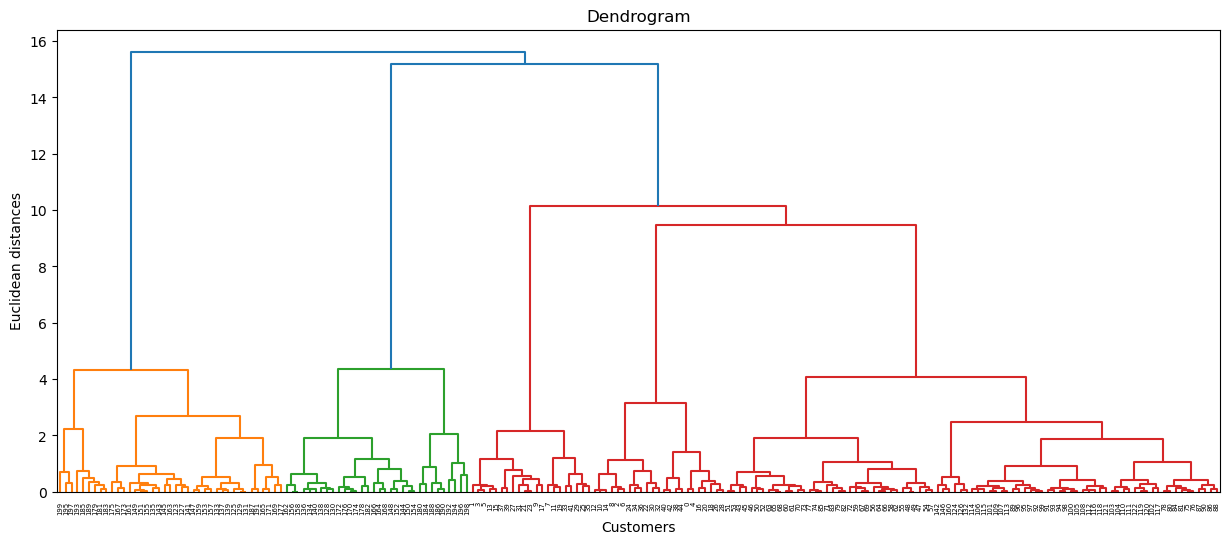

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(X)

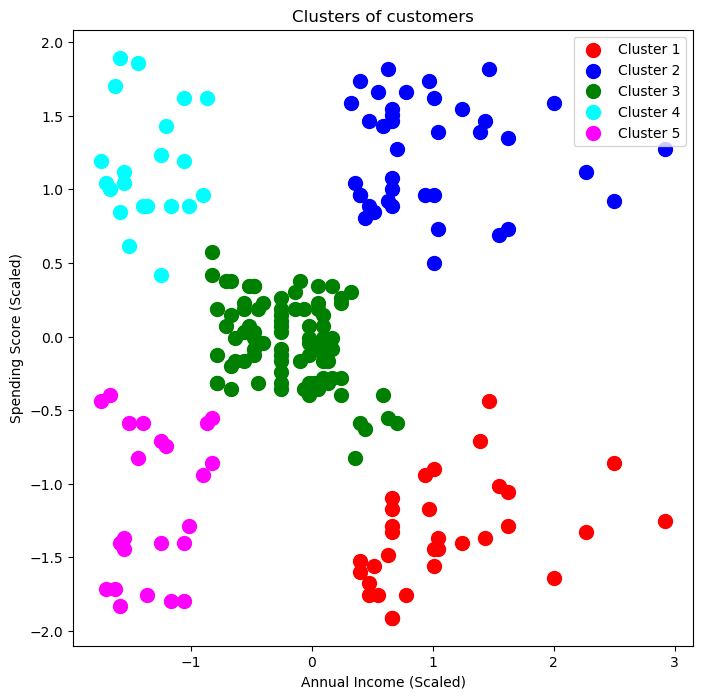

In [14]:
# Visualising the clusters
plt.figure(figsize = (8, 8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

Part 3: Density Based Spatial Clustering of Applications with Noise (DBSCAN)

In [15]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 2)
distances, indices = neighbors.fit(X).kneighbors(X)

distances = distances[:, 1]
distances = np.sort(distances, axis = 0)
plt.plot(distances)

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.25, min_samples = 5)
y_dbscan = dbscan.fit_predict(X)

In [17]:
# inspect the array to identify number of clusters
y_dbscan

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3, -1, -1,  5,  3, -1, -1,
        5, -1,  5,  3,  5,  3,  5, -1,  5,  3, -1,  3,  5,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

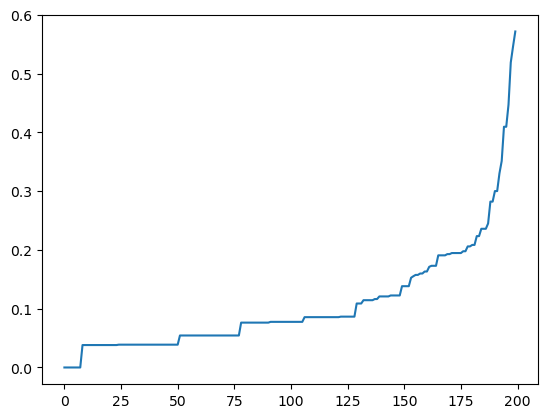

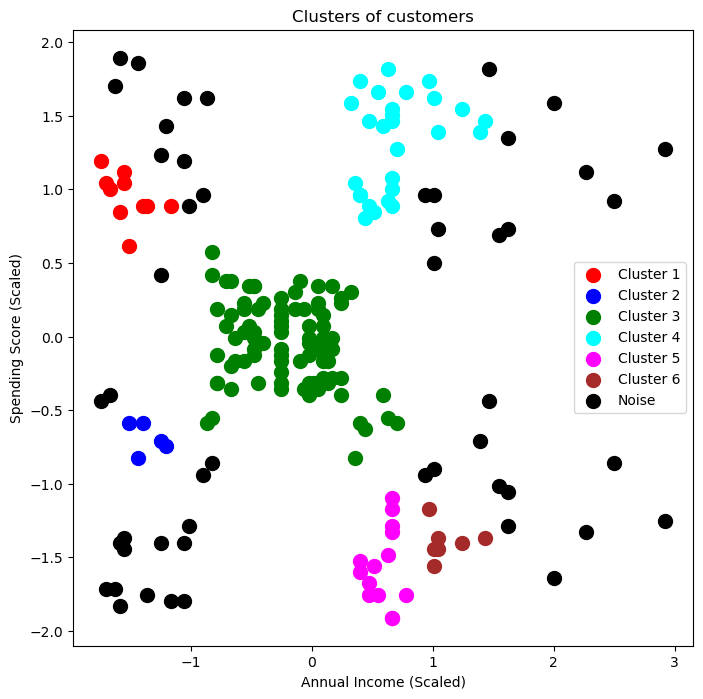

In [18]:
# Visualising the clusters
plt.figure(figsize = (8, 8))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_dbscan == 5, 0], X[y_dbscan == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'black', label = 'Noise')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

Part 4: Clustering Data with Higher Dimensionality

In [19]:
# Importing the dataset
financials = pd.read_csv('costpercompany.csv')

In [20]:
# Exploring the dataset
financials.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


In [21]:
# Exploring the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
# Exploring the dataset
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
X = financials.iloc[:, 1:9]
sns.pairplot(X)

In [24]:
# Scale the data


sc_X = StandardScaler()
X = sc_X.fit_transform(X)

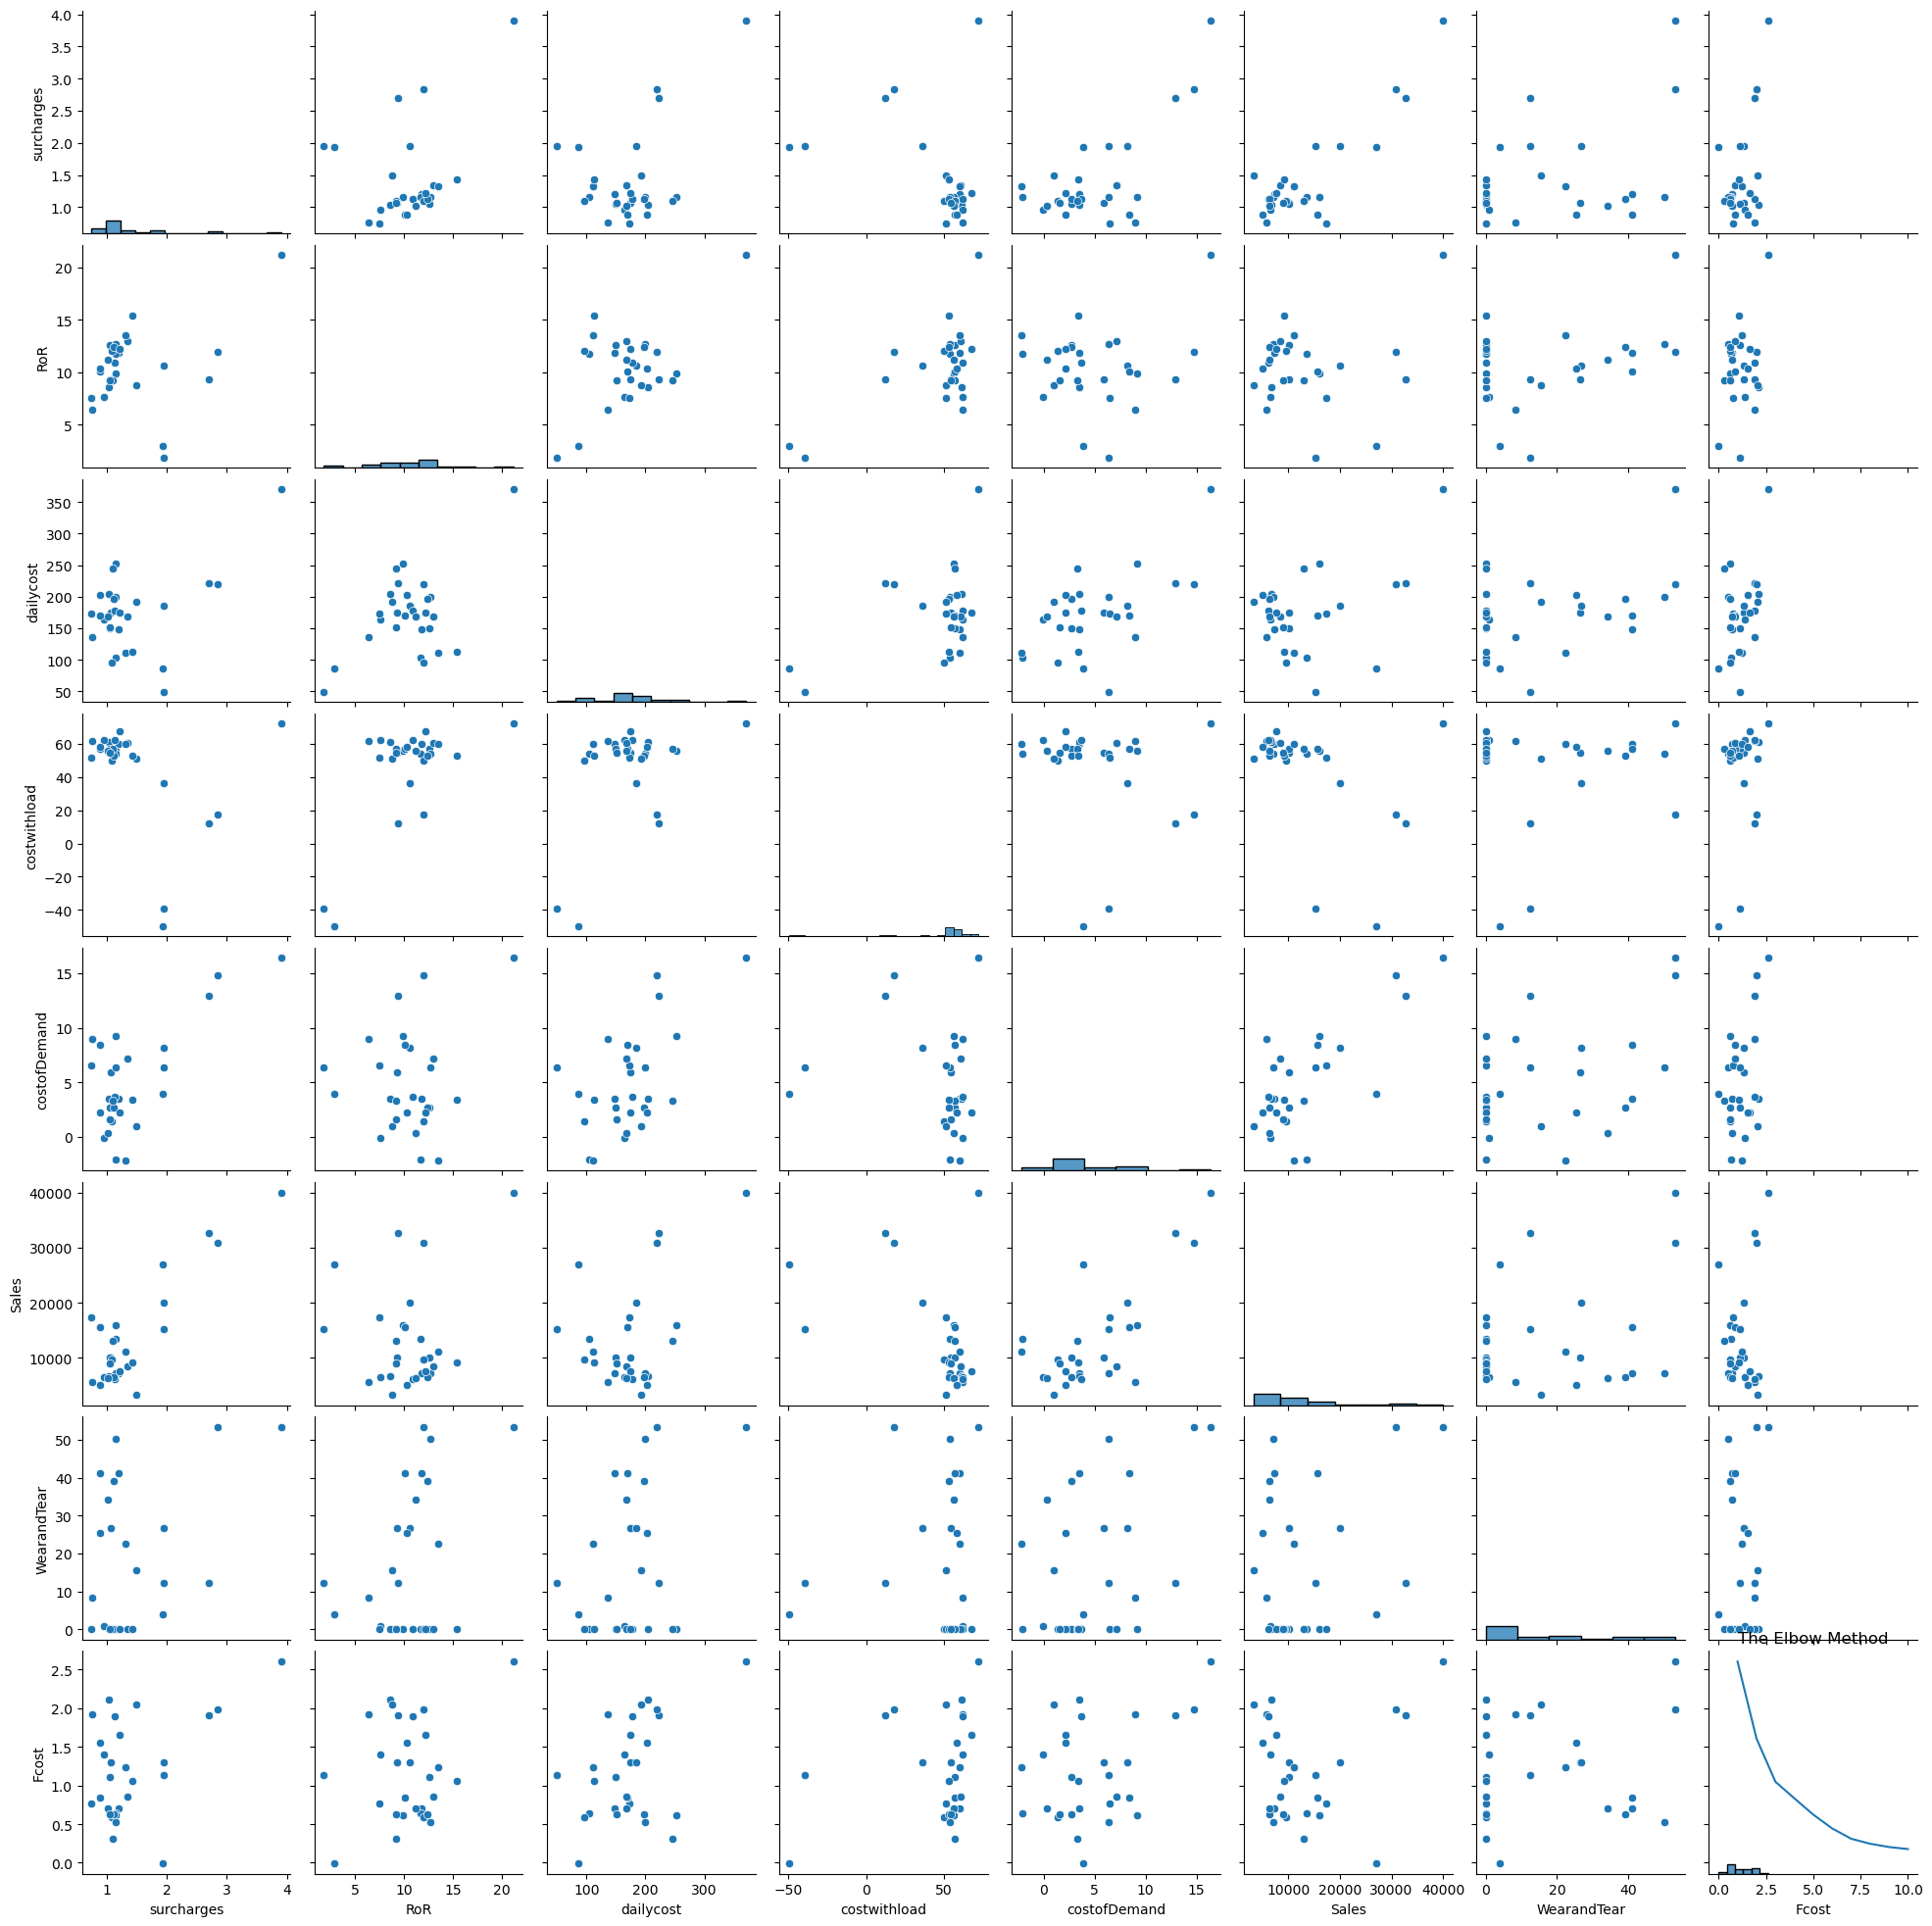

In [25]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [27]:
# Reducing dimensionality before visualisation

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.44839294, 0.25725108])

In [28]:
sum(pca.explained_variance_ratio_)

0.7056440181560042

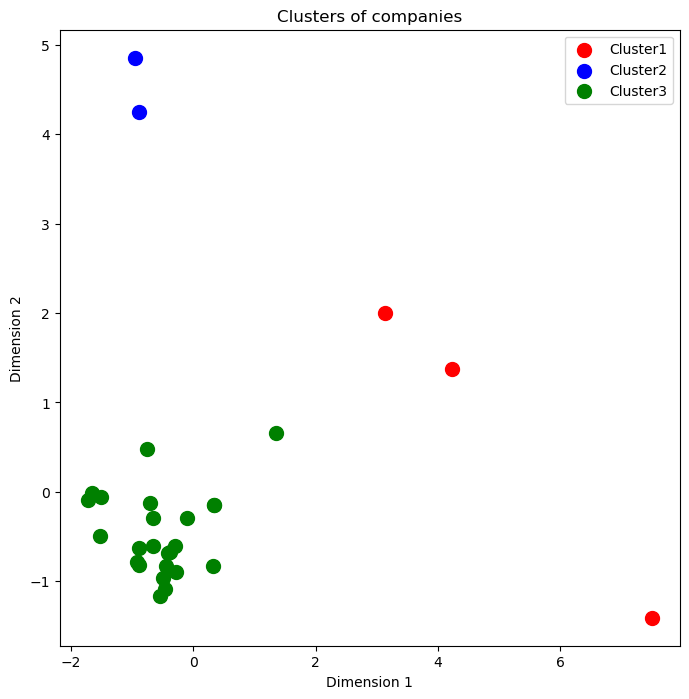

In [29]:
# Visualising the clusters

colors = ['red', 'blue', 'green']

plt.figure(figsize = (8, 8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1], s = 100, c = colors[i], label = 'Cluster' + str(i+1))
plt.title('Clusters of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

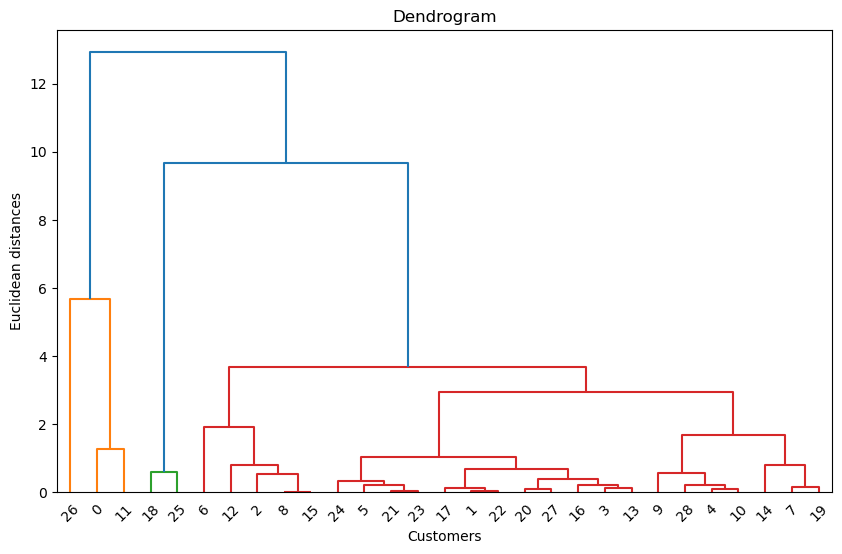

In [30]:
#Hierarchical Clustering
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(X_reduced)

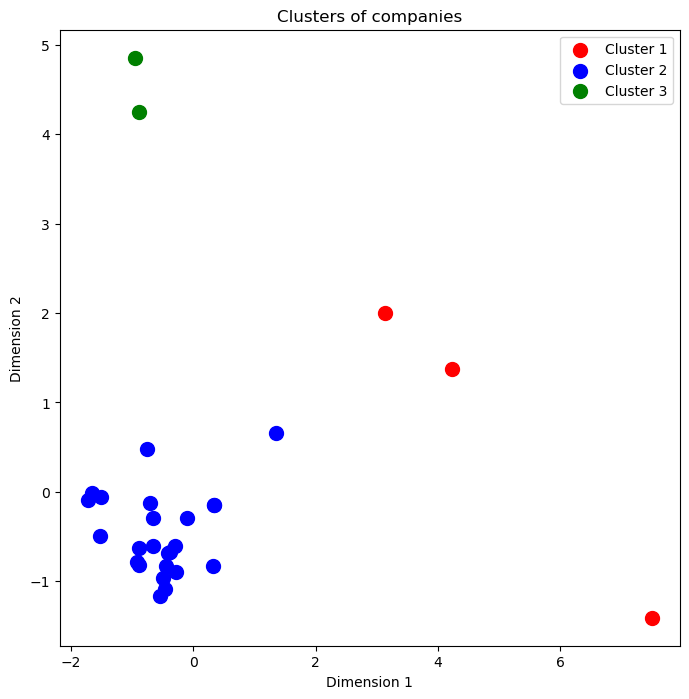

In [32]:
# Visualising the clusters

colors = ['red', 'blue', 'green']

plt.figure(figsize = (8, 8))
plt.scatter(X_reduced[y_hc == 0, 0], X_reduced[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_reduced[y_hc == 1, 0], X_reduced[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_reduced[y_hc == 2, 0], X_reduced[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [33]:
# DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors = 2)
distances, indices = neighbors.fit(X_reduced).kneighbors(X_reduced)

distances = distances[:, 1]
distances = np.sort(distances, axis = 0)
plt.plot(distances)

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 1.25, min_samples = 5)
y_dbscan = dbscan.fit_predict(X_reduced)

# inspect the array to identify number of clusters
y_dbscan

array([-1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0], dtype=int64)

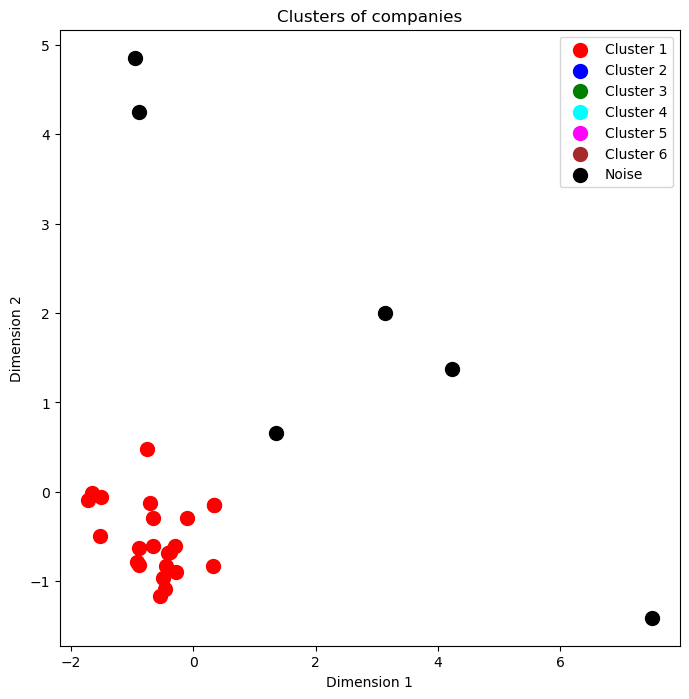

In [37]:
# Visualising the clusters
plt.figure(figsize = (8, 8))
plt.scatter(X_reduced[y_dbscan == 0, 0], X_reduced[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_reduced[y_dbscan == 1, 0], X_reduced[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_reduced[y_dbscan == 2, 0], X_reduced[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_reduced[y_dbscan == 3, 0], X_reduced[y_dbscan == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_reduced[y_dbscan == 4, 0], X_reduced[y_dbscan == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X_reduced[y_dbscan == 5, 0], X_reduced[y_dbscan == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(X_reduced[y_dbscan == -1, 0], X_reduced[y_dbscan == -1, 1], s = 100, c = 'black', label = 'Noise')
plt.title('Clusters of companies')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()